# Task 1: Learn the basics of Keras API for TensorFlow.

In [10]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

## Load fashion mnist data

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## MLP

In [ ]:
# Initialize model
MLP = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/Users/joris/Master AI/Year 1/Semester 1/Intr. Deep Learning/intro_idl_ass_1/intro_dl_ass_1/venv_IDL/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
MLP.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [ ]:
history_MLP = MLP.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7603 - loss: 0.7277 - val_accuracy: 0.8268 - val_loss: 0.5133
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8276 - loss: 0.4908 - val_accuracy: 0.8412 - val_loss: 0.4680
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8425 - loss: 0.4462 - val_accuracy: 0.8542 - val_loss: 0.4174
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8531 - loss: 0.4191 - val_accuracy: 0.8582 - val_loss: 0.4053
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8600 - loss: 0.3982 - val_accuracy: 0.8708 - val_loss: 0.3810
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8654 - loss: 0.3825 - val_accuracy: 0.8634 - val_loss: 0.3880
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8700 - loss: 0.3693 - val_accuracy: 0.8692 - val_loss: 0.3792
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8741 - loss: 0.3570 - 

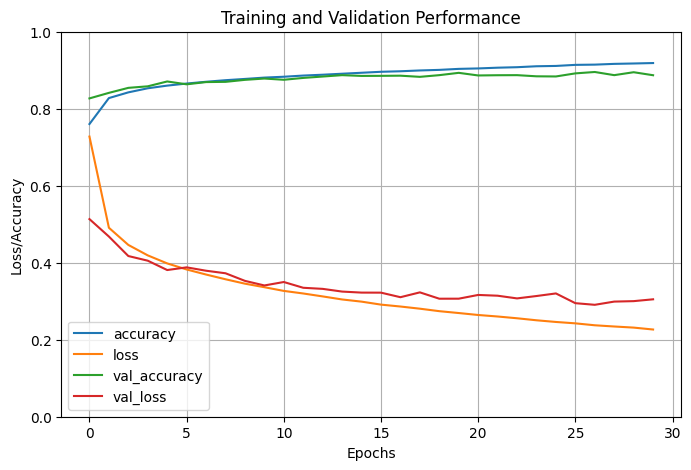

In [17]:
pd.DataFrame(history_MLP.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.title("Training and Validation Performance")
plt.show()

In [18]:
MLP.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8569 - loss: 59.9459


[59.945899963378906, 0.8568999767303467]